In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

from scipy.optimize import fsolve, root

In [2]:
def phi_51(x,a,c,x_max):
    
    return ( ( c**( (1) / (1+c) ) )*( np.exp( a*x_max ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( -c*a*x_max ) ) ) \
        / ( ( c**( (1) / (1+c) ) )*( np.exp( -a*(x-x_max) ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( c*a*(x-x_max) ) ) )

def phi_51_max(a,c,x_max):
    
    return phi_51(x_max,a,c,x_max)

def phi_51_mtd(a,c,x_max):
    
    return phi_51(1,a,c,x_max)

def phi_51_D_r(D_r,a,c,x_max):
    
    return phi_51(D_r,a,c,x_max)

def phi_51_Dr_rootfinder(x,a,c,x_max):
    
    return phi_51(x,a,c,x_max)-1

In [3]:
def overall_cmap_generator(levels, x_maxs, c_lim, a_lim, red_blue_transition, blue_red_transition):
    
    mtds = overallx2_max_min(levels,x_maxs,c_lim,a_lim)
    
    norm = plt.Normalize(mtds.min(), mtds.max())
    
    if ( mtds.min()<=red_blue_transition<=mtds.max() )&( mtds.min()<=blue_red_transition<=mtds.max() ): 

        rb_transition = (red_blue_transition - mtds.min() ) / (mtds.max() - mtds.min())
        br_transition = (blue_red_transition - mtds.min() ) / (mtds.max() - mtds.min())

        colors = [(0, 'yellow'), (rb_transition, 'blue'), (br_transition, 'blue'), (1, 'red')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

    elif ( red_blue_transition<=mtds.min() )&( blue_red_transition<=mtds.min() ): 

        colors = [(0, 'red'), (1, 'red')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

    elif ( red_blue_transition>=mtds.max() )&( blue_red_transition>=mtds.max() ): 

        colors = [(0, 'yellow'), (1, 'yellow')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

    elif ( mtds.min()>=red_blue_transition )&( mtds.max()<=blue_red_transition ):

        colors = [(0, 'blue'), (1, 'blue')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

    elif ( mtds.min()<=red_blue_transition<=mtds.max() )&( blue_red_transition>=mtds.max() ):

        rb_transition = (red_blue_transition - mtds.min() ) / (mtds.max() - mtds.min())

        colors = [(0, 'yellow'), (rb_transition, 'blue'), (1, 'blue')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

    elif ( red_blue_transition<=mtds.min() )&( mtds.min()<=blue_red_transition<=mtds.max() ):

        br_transition = (blue_red_transition - mtds.min() ) / (mtds.max() - mtds.min())

        colors = [(0, 'blue'), (br_transition, 'blue'), (1, 'red')]
        custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)
        
    return custom_cmap, norm

In [4]:
def overallx2_max_min(levels,x_maxs,c_lim,a_lim):
    
    i = 0 
    
    overall_mins = []
    overall_maxs = []
    
    for x_max in x_maxs:
        
        delta = 0.01   # mesh size
        crange = np.arange(0.0, c_lim[i], delta)  
        arange = np.arange(0.0,a_lim[i],delta) 
        c, a = np.meshgrid(crange,arange)
        equation = phi_51_max(a,c,x_max)     # define the function of interest

        plt.figure() 
        contour = plt.contour(c, a, equation, levels,colors='k') # generate the contour object to get your data points
        plt.close() # added to prevent the plot from showing

        # Obtain the coordinate points of the level curves

        c_coords = []   
        a_coords = []
        for line in contour.collections:
            paths = line.get_paths()
            for path in paths:
                vertices = path.vertices
                c_coords.append(vertices[:, 0])
                a_coords.append(vertices[:, 1])
                
        mtds_mins = []
        mtds_maxs = []
    
        for j in range(len(levels)):

            x_max_vals = x_max * np.ones(len(c_coords[j]))

            mtds = phi_51_mtd(a_coords[j],c_coords[j],x_max_vals)

            mtds_mins.append(mtds.min())
            mtds_maxs.append(mtds.max())

        overall_min = np.array(mtds_mins).min()
        overall_mins.append(overall_min)
        overall_max = np.array(mtds_maxs).max()
        overall_maxs.append(overall_max)

    overallx2_min = np.array(overall_mins).min()
    overallx2_max = np.array(overall_maxs).max()
        
    mtds = np.array([overallx2_min,overallx2_max])
    
    return mtds

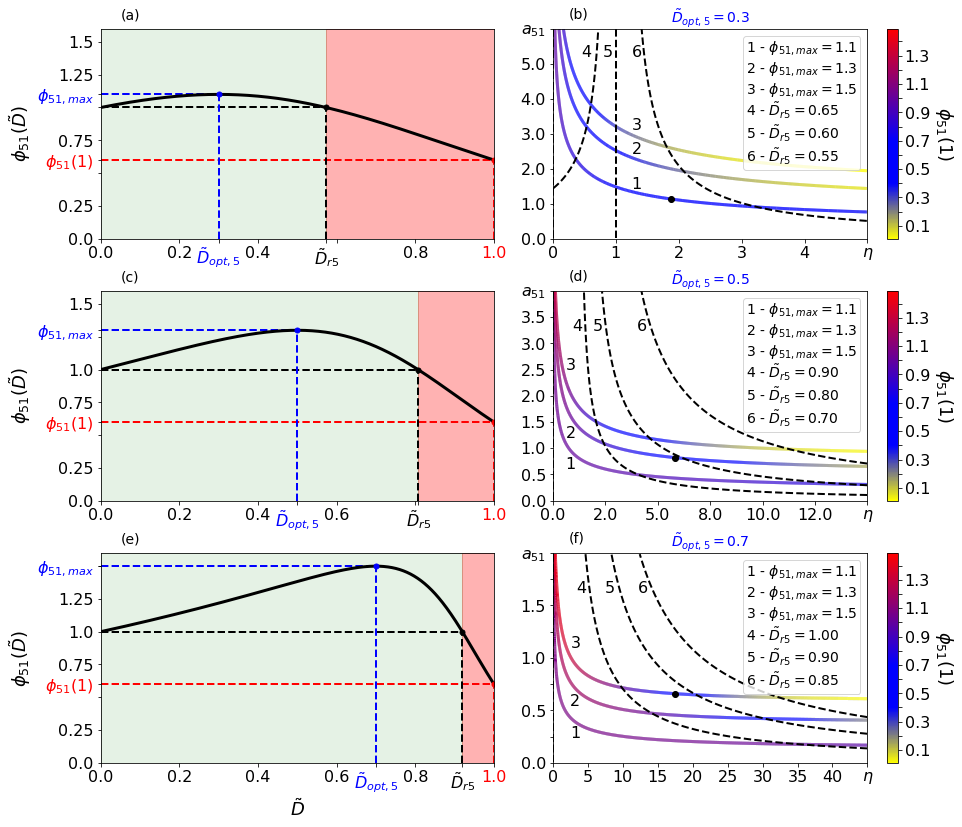

In [5]:
hsp = 0.25
wsp = 0.15

x_maxs = [0.3,0.5,0.7]   # x-value at which max's of function occur, one per figure.
c_lim = [5.0,15.0,45.0]   # upper limit of range of c values.
a_lim = [6.0,4.0,2.0]
levels = [1.1,1.3,1.5]    # max values of the function, one level curve per value in each figure.

# Define the range for the blue segment of colour map: 

red_blue_transition = 0.4  # lower limit  
blue_red_transition = 0.7   # upper limit

fig, axs = plt.subplots(3, 2, figsize=(15+wsp,13+2*hsp))

###########################

my_cmap, my_norm = overall_cmap_generator(levels, x_maxs, c_lim, a_lim, red_blue_transition, blue_red_transition)

###########################


i = 0

for x_max in x_maxs:   # for each x_max create a figure
    
    delta = 0.01   # mesh size
    crange = np.arange(0.0, c_lim[i], delta)  # range of c values
    arange = np.arange(0.0,a_lim[i],delta) # range of a values
    c, a = np.meshgrid(crange,arange)
    equation = phi_51_max(a,c,x_max)     # define the function of interest
    
    plt.figure() 
    contour = plt.contour(c, a, equation, levels,colors='k') # generate the contour object to get your data points
    plt.close() # added to prevent the plot from showing
    
    # Obtain the coordinate points of the level curves
    
    c_coords = []   
    a_coords = []
    for line in contour.collections:
        paths = line.get_paths()
        for path in paths:
            vertices = path.vertices
            c_coords.append(vertices[:, 0])
            a_coords.append(vertices[:, 1])
    
    # Find the minimum and maximum F(MTD) values across each level curve in the figure
    # to plot a single color bar for the figure that has all information.
    
    line_labels = [r'1 - $\phi_{51,max}=1.1$',r'2 - $\phi_{51,max}=1.3$',r'3 - $\phi_{51,max}=1.5$']
    
    for j in range(len(levels)):
        
        x_max_vals = x_max*np.ones(len(c_coords[j]))
        
        mtds = phi_51_mtd(a_coords[j],c_coords[j],x_max_vals)
        
        points = np.array([c_coords[j],a_coords[j]]).T.reshape(-1,1,2)
        segments = np.concatenate([points[:-1],points[1:]],axis=1)
        
        lc = LineCollection(segments, cmap=my_cmap, norm=my_norm)
    
        lc.set_array(mtds)
        lc.set_linewidth(3)
        line = axs[i,1].add_collection(lc)
        
        if j == len(levels)-1:
            
            cbar = fig.colorbar(lc, ax=axs[i,1])
            
            cbar.set_ticks(np.arange(0,2,0.1))
            cbar.ax.tick_params(labelsize=16)
            for label in cbar.ax.yaxis.get_ticklabels()[::2]:
                label.set_visible(False)
            cbar.set_label(r'$\phi_{51}(1)$', rotation=270, fontsize=18, labelpad=25)
    
    axs[i,1].set_xlim(0, c_lim[i])
    axs[i,1].set_ylim(0, a_lim[i])
    
    i=i+1
    
x_maxs = [0.3,0.5,0.7]

D_rs_s = [[0.55,0.6,0.65],
       [0.7,0.8,0.9],
       [0.85,0.9,1.0]]

c_lim = [5.0,15.0,45.0]  
a_lim = [6.0,4.0,2.0]

i=0

for x_max in x_maxs:
    
    D_rs = D_rs_s[i] 

    delta = 0.01

    crange = np.arange(0.0, c_lim[i], delta)
    arange = np.arange(0.01, a_lim[i],delta)
    c, a = np.meshgrid(crange,arange)

    for D_r in D_rs:

        equation = phi_51_D_r(D_r,a,c,x_max)     
    
        contour = axs[i,1].contour(c, a, equation, [1], colors='k', linestyles='dashed',linewidths=2)
        
    axs[i,1].set_xlim(0, c_lim[i])
    axs[i,1].set_ylim(0, a_lim[i])    
    
    i = i+1

    
a51_vals = [3.24071222,0.821,0.424]
c_vals = [0.51743062,5.824,28.84]
x_max_vals = [0.3,0.5,0.7]
    
a_locs = [1.131273724136915,0.8206400920808874,0.6584687511204834]
c_locs = [1.88,5.83,17.53]
    
for i in range(3):
    
    axs[i,1].plot(c_locs[i],a_locs[i],'k.',markersize=12)

Dr_locs = []

Ds = np.linspace(0,1,1000)

i=0

for a, c, x_max in zip(a_locs,c_locs,x_max_vals):
    
    g = (1-x_max)/2+x_max
    
    Dr_locs.append(fsolve(phi_51_Dr_rootfinder,g,args=(a,c,x_max))[0])

    axs[i,0].plot(Ds,phi_51(Ds,a,c,x_max),'k',linewidth=3)

    axs[i,0].hlines(1,0,Dr_locs[i],'k',linestyle='--',linewidth=2)
    axs[i,0].hlines(phi_51_max(a,c,x_max),0,x_max,'b',linestyle='--',linewidth=2)
    axs[i,0].hlines(phi_51(1,a,c,x_max),0,1,'r',linestyle='--',linewidth=2)
    
    axs[i,0].vlines(Dr_locs[i],0,phi_51(Dr_locs[i],a,c,x_max),'k',linestyles='--',linewidth=2)
    axs[i,0].vlines(x_max,0,phi_51(x_max,a,c,x_max),'b',linestyles='--',linewidth=2)
    axs[i,0].vlines(1,0,phi_51(1,a,c,x_max),'r',linestyles='--',linewidth=2)

    axs[i,0].plot(x_max,phi_51_max(a,c,x_max),'b.',markersize=10)
    axs[i,0].plot(1,phi_51(1,a,c,x_max),'r.',markersize=10)
    axs[i,0].plot(Dr_locs[i],phi_51(Dr_locs[i],a,c,x_max),'k.',markersize=10)
    
    axs[i,0].set_xlim(0,1)
    axs[i,0].set_ylim(0,1.5)

    i = i+1
    
######

axs[0,1].set_xticks(np.arange(0,5.1,1))
axs[1,1].set_xticks(np.arange(0,15.1,2.5))
axs[2,1].set_xticks(np.arange(0,45.1,5))


j = 0

for i in range(3):
    
    axs[i,j].set_ylabel(r'$\phi_{51}(\tilde{D})$',fontsize=18)
    axs[i,j].tick_params(axis='x', labelsize=12 )
    axs[i,j].tick_params(axis='y', labelsize=12 )
    
    if i == 2:
        
        axs[i,j].set_xlabel(r'$\tilde{D}$',fontsize=18)
        
j = 1 

for i in range(3):
    
    axs[i,j].tick_params(axis='x', labelsize=12 )
    axs[i,j].tick_params(axis='y', labelsize=12 )
    
    
lbls = np.array([['(a)','(b)'],['(c)','(d)'],['(e)','(f)']])
xmax_titls = [r'$\tilde{D}_{opt,5}=0.3$',r'$\tilde{D}_{opt,5}=0.5$',r'$\tilde{D}_{opt,5}=0.7$']

col1_xco_ords = 0.1/2
col1_yco_ords = 1.5+0.15/2

col2_xco_ords = [0.5/2,1.5/2,4.5/2]
col2_yco_ords = [6+0.6/2,4+0.4/2,2+0.2/2]

for i in range(3):
    
    for j in range(2):
        
        if j == 0:

            axs[i,j].text(col1_xco_ords,col1_yco_ords+0.1,lbls[i,j],fontsize=14)
            
        elif j == 1: 
            
            axs[i,j].text(col2_xco_ords[i],col2_yco_ords[i],lbls[i,j],fontsize=14)
            axs[i,j].set_title(xmax_titls[i],fontsize=14,color='blue')

######
# ADDING THE TICK LABELS

# Xticks

base_xticks = np.arange(0,1.1,0.2)

for i in range(3):
    
    xticks_extra = np.array([Dr_locs[i],x_max_vals[i]])
    xticks = np.sort( np.concatenate( (base_xticks,xticks_extra) ) )
    
    lbls = []
    count = 0 
    
    for num in xticks:
        
        if (round(num,8)*10)%(2) == 0.0:
            
            if ( (round(num,1)-0.2/3) <= xticks_extra[0] <=  (round(num,1)+0.2/3) ) or \
            ( (round(num,1)-0.2/3) <= xticks_extra[1] <=  (round(num,1)+0.2/3) ):
                
                lbls.append('')
            
            else: 
                
                lbls.append(str(round(num,1)))
            
        else: 
            
            if count==0:
                
                lbls.append(r'$\tilde{D}_{opt,5}$')
                pos_Dopt = len(lbls)-1
                
            else:
                
                lbls.append(r'$\tilde{D}_{r5}$')
                pos_Dr = len(lbls)-1
            
            count = count + 1
    
    axs[i,0].set_xticks(xticks)
    axs[i,0].set_xticklabels(lbls,fontsize=16)
    
    axs[i,0].get_xticklabels()[pos_Dr].set_color('black')
    axs[i,0].get_xticklabels()[pos_Dopt].set_color('blue')
    axs[i,0].get_xticklabels()[-1].set_color('red')

    
    
base_yticks = np.arange(0,1.75,0.25)



for i in range(3):
    
    yticks_extra = np.array([phi_51(x_max_vals[i],a_locs[i],c_locs[i],x_max_vals[i]),\
                            phi_51(1,a_locs[i],c_locs[i],x_max_vals[i])])
    yticks = np.sort( np.concatenate( (base_yticks,yticks_extra) ) )
    
    lbls = []
    count = 0 
    
    for num in yticks:
        
        if (round(num,8)*100)%(25) == 0.0:
            
            if ( (round(num,2)-0.25*0.45) <= yticks_extra[0] <=  (round(num,2)+0.25*0.45) ) or \
            ( (round(num,2)-0.25*0.45) <= yticks_extra[1] <=  (round(num,2)+0.25*0.45) ):
                
                lbls.append('')
            
            else: 
                
                lbls.append(str(round(num,2)))
            
        else: 
            
            if count==0:
                
                lbls.append(r'$\phi_{51}(1)$')
                pos_phi1 = len(lbls)-1
                
            else:
                
                lbls.append(r'$\phi_{51,max}$')
                pos_phiDopt = len(lbls)-1
            
            count = count + 1
    
    axs[i,0].set_yticks(yticks)
    axs[i,0].set_yticklabels(lbls,fontsize=16)
    
    axs[i,0].get_yticklabels()[pos_phi1].set_color('red')
    axs[i,0].get_yticklabels()[pos_phiDopt].set_color('blue')
    axs[i,0].get_yticklabels()[5].set_color('black')
    
######


######
# ADDING LABELS TO THE CONTOUR LINES:

D_rs_s = [[0.55,0.6,0.65],
       [0.7,0.8,0.9],
       [0.85,0.9,1.0]]

line_labels = [r'1 - $\phi_{51,max}=1.1$',r'2 - $\phi_{51,max}=1.3$',r'3 - $\phi_{51,max}=1.5$']

tmp = 0

for i in range(3):
    
    for lbl in line_labels:
    
        axs[i,1].plot(-2,-2,'w.',label=lbl)

for i in range(3):
    
    D_rs = D_rs_s[i]
        
    d = 6
    for D_r in D_rs:
        axs[i,1].plot(-1,-1,'w.',label=r'%d - $\tilde{D}_{r5}=%.2f$'%(d,D_r))
        d=d-1
    
    handles, labels = axs[i,1].get_legend_handles_labels()
    order = [0,1,2,5,4,3]
    axs[i,1].legend([handles[idx] for idx in order],[labels[idx] for idx in order],handlelength=0,labelspacing=0.2,fontsize=14\
                   ,borderpad=0.2,handletextpad=0)
    
       
        
        
# Numbering the lines

axs[0,1].text(1.25,1.42,'1',fontsize=16)
axs[0,1].text(1.25,2.42,'2',fontsize=16)
axs[0,1].text(1.25,3.1,'3',fontsize=16)
axs[0,1].text(0.45,5.2,'4',fontsize=16)
axs[0,1].text(0.8,5.2,'5',fontsize=16)
axs[0,1].text(1.25,5.2,'6',fontsize=16)

axs[1,1].text(0.6,0.6,'1',fontsize=16)
axs[1,1].text(0.6,1.2,'2',fontsize=16)
axs[1,1].text(0.6,2.5,'3',fontsize=16)
axs[1,1].text(0.9,3.25,'4',fontsize=16)
axs[1,1].text(1.9,3.25,'5',fontsize=16)
axs[1,1].text(4,3.25,'6',fontsize=16)

axs[2,1].text(2.5,0.24,'1',fontsize=16)
axs[2,1].text(2.5,0.54,'2',fontsize=16)
axs[2,1].text(2.5,1.1,'3',fontsize=16)
axs[2,1].text(3.4,1.625,'4',fontsize=16)
axs[2,1].text(7.45,1.625,'5',fontsize=16)
axs[2,1].text(12.2,1.625,'6',fontsize=16)

######

# Right column ticks: 

tick_labels = []
xticks = np.arange(0,6,1)
axs[0,1].set_xticks(xticks)
for xtick in xticks:
    if xtick != 5.0:
        tick_labels.append(str(round(xtick,0)))
    elif xtick == 5.0:
        tick_labels.append(r'$\eta$')
axs[0,1].set_xticklabels(tick_labels,fontsize=16)

tick_labels = []
xticks = np.arange(0,16,2.5)
axs[1,1].set_xticks(xticks)
for xtick in xticks:
    if xtick != 15.0:
        tick_labels.append(str(round(xtick,0)))
    elif xtick == 15.0:
        tick_labels.append(r'$\eta$')
axs[1,1].set_xticklabels(tick_labels,fontsize=16)

tick_labels = []
xticks = np.arange(0,46,5)
axs[2,1].set_xticks(xticks)
for xtick in xticks:
    if xtick != 45.0:
        tick_labels.append(str(round(xtick,0)))
    elif xtick == 45.0:
        tick_labels.append(r'$\eta$')
axs[2,1].set_xticklabels(tick_labels,fontsize=16)



tick_labels = []
yticks = np.arange(0,6.1,1)
axs[0,1].set_yticks(yticks)
for ytick in yticks:
    if ytick != 6.0:
        tick_labels.append(str(round(ytick,2)))
    elif ytick==6.0:
        tick_labels.append(r'$a_{51}$')
axs[0,1].set_yticklabels(tick_labels,fontsize=16)

tick_labels = []
yticks = np.arange(0,4.1,0.5)
axs[1,1].set_yticks(yticks)
for ytick in yticks:
    if ytick != 4.0:
        tick_labels.append(str(round(ytick,2)))
    elif ytick==4.0:
        tick_labels.append(r'$a_{51}$')
axs[1,1].set_yticklabels(tick_labels,fontsize=16)

tick_labels = []
yticks = np.arange(0,2.1,0.25)
axs[2,1].set_yticks(yticks)
for ytick in yticks:
    if ytick != 2.0:
        tick_labels.append(str(round(ytick,2)))
    elif ytick==2.0:
        tick_labels.append(r'$a_{51}$')
axs[2,1].set_yticklabels(tick_labels,fontsize=16)
for label in axs[2,1].yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

######

for i in range(3):
    axs[i,0].set_ylim(0,1.6)

######
# Adding colour to background

for i in range(3):
    
    axs[i,0].axhspan(0,1.6,Dr_locs[i],1,alpha=0.3,color='red',zorder=-100)
    axs[i,0].axhspan(0,1.6,0,Dr_locs[i],alpha=0.1,color='green',zorder=-100)

######
    
    
fig.subplots_adjust(hspace=hsp,wspace=wsp)